## 1) Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import bs4
import requests
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#import spotipy
#from spotipy.oauth2 import SpotifyClientCredentials
#client_credentials_manager = SpotifyClientCredentials(client_id='491862eccb624461a90a6ec9a26c94d7', client_secret='342e7a81e01241799d0ff4a6319eaf82')
#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


## 2) Scraping the data

In [2]:
file_path = r'/Users/ardaturan/Desktop/index.html'

with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = bs4.BeautifulSoup(html_content, 'html.parser')
pretty_html = soup.prettify()

***

In [24]:
music_blocks = soup.findAll('tr', {'data-id-song': True})


In [4]:
def scrap_page(music_blocks):
    musicb_data = {}
    musicb_data["#"] = []
    musicb_data["Song"] = []
    musicb_data["Artist"] = []
    musicb_data["Popularity"] = []
    musicb_data["BPM"] = []
    musicb_data["Genres"] = []
    musicb_data["Parent Genres"] = []
    musicb_data["Album"] = []
    musicb_data["Album Date"] = []
    musicb_data["Time"] = []
    musicb_data["Dance"] = []
    musicb_data["Energy"] = []
    musicb_data["Acoustic"] = []
    musicb_data["Instrumental"] = []
    musicb_data["Happy"] = []
    musicb_data["Speech"] = []
    musicb_data["Live"] = []
    musicb_data["Loud"] = []
    musicb_data["Key"] = []
    musicb_data["Time Signature"] = []
    musicb_data["Added at"] = []
    musicb_data["Spotify Track Id"] = []
    musicb_data["Album Label"] = []
    musicb_data["Camelot"] = []
    musicb_data["Spotify Track Img"] = []
    musicb_data["Song Preview"] = []
    
    
    for music in music_blocks:
        music_index = music.find("td", {"class" : "td-number text-center"}).get_text()
        try:
            musicb_data["#"].append(music_index)
        except:
            musicb_data["#"].append("None")
        
        music_name = music.find("td", {"class" : "td-name"}).get_text()
        try:
            musicb_data["Song"].append(music_name)
        except:
            musicb_data["Song"].append("None")
            
        music_img = music.findAll("img", {"class" : "track-table-img"})
        for img in music_img:
            if img.get("src") is not None:
                image = img["src"]
        try:
            musicb_data["Spotify Track Img"].append(image)
        except:
            musicb_data["Spotify Track Img"].append("None")
            
        music_pre = music.findAll('div', {'class': 'track-list-item-right suggest-player-table suggest-player'})
        for pre in music_pre:
            if pre.get('data-previewurl') is not None:
                link = pre['data-previewurl']
        try:
            musicb_data["Song Preview"].append(link)
        except:
            musicb_data["Song Preview"].append("None")
        
        music_artist = music.find("td", {"class" : "td-number oferflow"}).get_text()
        try:
            musicb_data["Artist"].append(music_artist)
        except:
            musicb_data["Artist"].append("None")

        music_popularity0 = music.findAll("td", {"class" : "td-number text-center"})
        music_popularity = music_popularity0[1].get_text()
        try:
            musicb_data["Popularity"].append(music_popularity)
        except:
            musicb_data["Popularity"].append("None")

        music_BPM0 = music.findAll("td", {"class" : "td-number text-center"})
        music_BPM = music_BPM0[2].get_text()
        try:
            musicb_data["BPM"].append(music_BPM)
        except:
            musicb_data["BPM"].append("None")

        music_genres0 = music.findAll("td", {"class" : "td-number oferflow"})
        music_genres = music_genres0[1].get_text()
        try:
            musicb_data["Genres"].append(music_genres)
        except:
            musicb_data["Genres"].append("None")

        music_parent_genre0 = music.findAll("td", {"class": "td-number oferflow"})
        music_parent_genre = music_parent_genre0[2].get_text()
        try:
            musicb_data["Parent Genres"].append(music_parent_genre)
        except:
            musicb_data["Parent Genres"].append("None")

        music_album0 = music.findAll("td", {"class": "td-number oferflow"})
        music_album = music_album0[3].get_text()
        try:
            musicb_data["Album"].append(music_album)
        except:
            musicb_data["Album"].append("None")

        music_album_date0 = music.findAll("td", {"class" : "td-number text-center"})
        music_album_date = music_album_date0[3].get_text()
        try:
            musicb_data["Album Date"].append(music_album_date)
        except:
            musicb_data["Album Date"].append("None")

        music_time0 = music.findAll("td", {"class" : "td-number text-center"})
        music_time = music_time0[4].get_text()    
        try:
            musicb_data["Time"].append(music_time)
        except:
            musicb_data["Time"].append("None")

        music_dance0 = music.findAll("td", {"class" : "td-number text-center"})
        music_dance = music_dance0[5].get_text()  
        try:
            musicb_data["Dance"].append(music_dance)
        except:
            musicb_data["Dance"].append("None")

        music_energy0 = music.findAll("td", {"class" : "td-number text-center"})
        music_energy = music_energy0[6].get_text()    
        try:
            musicb_data["Energy"].append(music_energy)
        except:
            musicb_data["Energy"].append("None")

        music_acoustic0 = music.findAll("td", {"class" : "td-number text-center"})
        music_acoustic = music_acoustic0[7].get_text()    
        try:
            musicb_data["Acoustic"].append(music_acoustic)
        except:
            musicb_data["Acoustic"].append("None")

        music_instrumental0 = music.findAll("td", {"class" : "td-number text-center"})
        music_instrumental = music_instrumental0[8].get_text()    
        try:
            musicb_data["Instrumental"].append(music_instrumental)
        except:
            musicb_data["Instrumental"].append("None")

        music_happy0 = music.findAll("td", {"class" : "td-number text-center"})
        music_happy = music_happy0[9].get_text()    
        try:
            musicb_data["Happy"].append(music_happy)
        except:
            musicb_data["Happy"].append("None")

        music_speech0 = music.findAll("td", {"class" : "td-number text-center"})
        music_speech = music_speech0[10].get_text()    
        try:
            musicb_data["Speech"].append(music_speech)
        except:
            musicb_data["Speech"].append("None")

        music_live0 = music.findAll("td", {"class" : "td-number text-center"})
        music_live = music_live0[11].get_text()    
        try:
            musicb_data["Live"].append(music_live)
        except:
            musicb_data["Live"].append("None")

        music_loud0 = music.findAll("td", {"class" : "td-number text-center"})
        music_loud = music_loud0[12].get_text()     
        try:
            musicb_data["Loud"].append(music_loud)
        except:
            musicb_data["Loud"].append("None")

        music_key0 = music.findAll("td", {"class" : "td-number text-center"})
        music_key = music_key0[13].get_text()     
        try:
            musicb_data["Key"].append(music_key)
        except:
            musicb_data["Key"].append("None")

        music_time_signature0 = music.findAll("td", {"class" : "td-number text-center"})
        music_time_signature = music_time_signature0[14].get_text()     
        try:
            musicb_data["Time Signature"].append(music_time_signature)
        except:
            musicb_data["Time Signature"].append("None")

        music_added0 = music.findAll("td", {"class" : "td-number text-center"})
        music_added = music_added0[15].get_text()    
        try:
            musicb_data["Added at"].append(music_added)
        except:
            musicb_data["Added at"].append("None")

        music_spotify_trackid0 = music.findAll("td", {"class" : "td-number text-center"})
        music_spotify_trackid = music_spotify_trackid0[16].get_text()      
        try:
            musicb_data["Spotify Track Id"].append(music_spotify_trackid)
        except:
            musicb_data["Spotify Track Id"].append("None")

        music_album_label0 = music.findAll("td", {"class" : "td-number text-center"})
        music_album_label = music_album_label0[17].get_text()      
        try:
            musicb_data["Album Label"].append(music_album_label)
        except:
            musicb_data["Album Label"].append("None")

        music_camelot0 = music.findAll("td", {"class" : "td-number text-center"})
        music_camelot = music_camelot0[18].get_text()      
        try:
            musicb_data["Camelot"].append(music_camelot)
        except:
            musicb_data["Camelot"].append("None")

    return musicb_data


In [5]:
def scrape_m_page(music_blocks):
    page_music_data = []
    
    num_blocks = len(music_blocks)
    
    for idx in range(num_blocks):
        page_music_data.append(scrape_mblock(music_blocks[idx]))
        
    return page_music_data


In [6]:
#base_scraping_link = r'/Users/ardaturan/Desktop/SABANCI/Sophomore 2/CS 210/HW1/CS210 - Homework 1 - for BeautifulSoup.html'

music_list = []

music = scrap_page(music_blocks)
df = pd.DataFrame(music)

df = df.rename(index = lambda x: x + 1)

df


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview
1,1,The Power of Love,Céline Dion,73,140,canadian pop,Pop,The Colour Of My Love,1993-11-09,05:42,...,20,-9 db,G#/A♭ Major,4,2023-12-10,5kK1Iru9ogP3Iy1zsANU1n,Columbia,4B,https://i.scdn.co/image/ab67616d00004851b3d0e0...,https://p.scdn.co/mp3-preview/7d88cb368e189a99...
2,2,Love In Portofino,Andrea Bocelli,49,95,"classical tenor, italian tenor, operatic pop","Classical, Pop",Love In Portofino,2013-01-01,03:00,...,0,-10 db,C Minor,4,2023-12-10,34btMnuONjpqdibkFGvFz5,Universal Music Group International,5A,https://i.scdn.co/image/ab67616d00004851435af4...,null
3,3,Bésame Mucho,"Consuelo Velázquez,Andrea Bocelli",58,95,"classical tenor, italian tenor, operatic pop","Classical, Pop",Amor (Spanish Edition / Remastered),2006-01-01,04:01,...,10,-9 db,F Minor,4,2023-12-10,5WHnE8MsLFHqSUwecrs7WO,Universal Music Group International,4A,https://i.scdn.co/image/ab67616d000048517068ff...,null
4,4,Con te partirò,Andrea Bocelli,37,102,"classical tenor, italian tenor, operatic pop","Classical, Pop",Romanza (Remastered),1996-01-01,04:11,...,0,-8 db,G Major,4,2023-12-10,6T720JbJdg8lB5kqfvh5mk,Universal Music Group International,9B,https://i.scdn.co/image/ab67616d000048512f2b98...,null
5,5,L'italiano,Toto Cutugno,71,121,classic italian pop,Pop,L'Italiano,1983-02-01,03:56,...,40,-11 db,A#/B♭ Minor,4,2023-12-10,2S7RApTsKT0CtYojYq2cKz,Carosello Records,3A,https://i.scdn.co/image/ab67616d00004851d919d1...,https://p.scdn.co/mp3-preview/75200ca2b1076f59...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,385,Минимал,Eldzhey,55,110,"russian hip hop, russian pop","Hip Hop, Pop",Sayonara Boy X,2018-03-27,03:22,...,10,-8 db,A#/B♭ Major,4,2023-12-10,3S0x65t4UEMl0voKHXdSev,Zion Music,6B,https://i.scdn.co/image/ab67616d00004851798881...,https://p.scdn.co/mp3-preview/a7866f666e365ee7...
386,386,Дисконнект,"Eldzhey,Kravz",51,120,"russian hip hop, russian pop","Hip Hop, Pop",Sayonara Boy,2016-10-07,03:54,...,20,-7 db,C Major,4,2023-12-10,2ljYT3DjHXVrygwDbNjm4n,Cream&Nal Records,8B,https://i.scdn.co/image/ab67616d00004851655135...,https://p.scdn.co/mp3-preview/2bbe8fa026ab2252...
387,387,1love,Eldzhey,37,112,"russian hip hop, russian pop","Hip Hop, Pop",1love,2018-07-20,03:10,...,10,-4 db,C♯/D♭ Major,4,2023-12-10,05TQ1Go0lWyuG8p1sQofxR,Zion Music,3B,https://i.scdn.co/image/ab67616d00004851a3bbfa...,https://p.scdn.co/mp3-preview/fb77994bd50daeab...
388,388,NBA (Rompasso Remix),"RSAC,Rompasso",41,120,"russian alt pop, russian indie, g-house, pop e...","Electronic, Pop",NBA (Remixes),2019-06-28,02:53,...,10,-6 db,E Major,3,2023-12-10,5O2OHty6ijfKDN3twVWJRC,We are communa,12B,https://i.scdn.co/image/ab67616d000048515afd45...,https://p.scdn.co/mp3-preview/98b7ac89b7ebdb8f...


***
# Description of the Dataset (EDA) & Preprocessing

Let's learn more about my dataset. In this part, you will see the shape of my dataset.
***


In [7]:
print("Number of columns (features) are:", df.shape[1])
print("Number of rows (samplings) are:", df.shape[0])


Number of columns (features) are: 26
Number of rows (samplings) are: 389


***

In [8]:
df.describe().transpose()


,count,unique,top,freq
#,389,389,1,1
Song,389,388,Мир сошёл с ума,2
Artist,389,285,Travis Scott,10
Popularity,389,77,56,13
BPM,389,98,120,21
Genres,389,215,russian pop,25
Parent Genres,389,61,Pop,94
Album,389,341,ASTROWORLD,4
Album Date,389,301,2018-08-03,6
Time,389,177,03:53,8


***

In [9]:
print("Each columns' non-null counts and their data types: \n")

df[['#', 'Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']] = df[['#', 'Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']].apply(pd.to_numeric)
df['Loud'] = df['Loud'].str.extract('(-?\d+)').astype(int)

df.info()


Each columns' non-null counts and their data types: 

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1 to 389
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   #                  389 non-null    int64 
 1   Song               389 non-null    object
 2   Artist             389 non-null    object
 3   Popularity         389 non-null    int64 
 4   BPM                389 non-null    int64 
 5   Genres             389 non-null    object
 6   Parent Genres      389 non-null    object
 7   Album              389 non-null    object
 8   Album Date         389 non-null    object
 9   Time               389 non-null    object
 10  Dance              389 non-null    int64 
 11  Energy             389 non-null    int64 
 12  Acoustic           389 non-null    int64 
 13  Instrumental       389 non-null    int64 
 14  Happy              389 non-null    int64 
 15  Speech             389 non-null    int64 


***
Checking if there is any null row.
***
**Fact:** You see there is no empty row which is a good feature in terms of avoiding the one from getting weird results when implementing Machine Learning models.

In [10]:
print("Getting how many rows are null for each feature: \n", df.isna().sum())


Getting how many rows are null for each feature: 
 #                    0
Song                 0
Artist               0
Popularity           0
BPM                  0
Genres               0
Parent Genres        0
Album                0
Album Date           0
Time                 0
Dance                0
Energy               0
Acoustic             0
Instrumental         0
Happy                0
Speech               0
Live                 0
Loud                 0
Key                  0
Time Signature       0
Added at             0
Spotify Track Id     0
Album Label          0
Camelot              0
Spotify Track Img    0
Song Preview         0
dtype: int64


***
I removed 'Spotify Track Img' and 'Song Preview' columns since they have no contribution to ordering.

In [11]:
df.drop(['Spotify Track Img'], axis = 1, inplace=True)
df.drop(['Song Preview'], axis = 1, inplace=True)

df.head()


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot
1,1,The Power of Love,Céline Dion,73,140,canadian pop,Pop,The Colour Of My Love,1993-11-09,05:42,...,25,0,20,-9,G#/A♭ Major,4,2023-12-10,5kK1Iru9ogP3Iy1zsANU1n,Columbia,4B
2,2,Love In Portofino,Andrea Bocelli,49,95,"classical tenor, italian tenor, operatic pop","Classical, Pop",Love In Portofino,2013-01-01,03:00,...,36,0,0,-10,C Minor,4,2023-12-10,34btMnuONjpqdibkFGvFz5,Universal Music Group International,5A
3,3,Bésame Mucho,"Consuelo Velázquez,Andrea Bocelli",58,95,"classical tenor, italian tenor, operatic pop","Classical, Pop",Amor (Spanish Edition / Remastered),2006-01-01,04:01,...,38,0,10,-9,F Minor,4,2023-12-10,5WHnE8MsLFHqSUwecrs7WO,Universal Music Group International,4A
4,4,Con te partirò,Andrea Bocelli,37,102,"classical tenor, italian tenor, operatic pop","Classical, Pop",Romanza (Remastered),1996-01-01,04:11,...,28,0,0,-8,G Major,4,2023-12-10,6T720JbJdg8lB5kqfvh5mk,Universal Music Group International,9B
5,5,L'italiano,Toto Cutugno,71,121,classic italian pop,Pop,L'Italiano,1983-02-01,03:56,...,69,0,40,-11,A#/B♭ Minor,4,2023-12-10,2S7RApTsKT0CtYojYq2cKz,Carosello Records,3A


***
I convert 'Added at' and 'Album Date' feature column, to datetime data type which was an object type before.

In [12]:
#df["Added at"] = pd.to_datetime(df['Added at'])
#df["Album Date"] = pd.to_datetime(df['Album Date'])

#df.head()


***
Since I have finished investigating recurring or null values, I move on with the most interesting part, which is the sorting.
***
First, I start with the most popular songs.

In [13]:
a= df.sort_values('Popularity',ascending=False)[:10]
a[['Song','Popularity','Artist','Genres']]


,Song,Popularity,Artist,Genres
218,Popular (with Playboi Carti & Madonna) - M...,95,"The Weeknd,Playboi Carti,Madonna","canadian contemporary r&b, canadian pop, pop, ..."
213,Die For You,91,The Weeknd,"canadian contemporary r&b, canadian pop, pop"
301,FE!N (feat. Playboi Carti),91,"Travis Scott,Playboi Carti","hip hop, rap, slap house, atl hip hop, plugg, ..."
179,The Hills,90,The Weeknd,"canadian contemporary r&b, canadian pop, pop"
196,Skyfall,89,Adele,"british soul, pop, pop soul, uk pop"
276,goosebumps,89,Travis Scott,"hip hop, rap, slap house"
76,Dancing Queen,88,ABBA,"europop, swedish pop"
191,Under The Influence,88,Chris Brown,"r&b, rap"
180,Call Out My Name,88,The Weeknd,"canadian contemporary r&b, canadian pop, pop"
207,Escapism.,87,"RAYE,070 Shake","uk contemporary r&b, uk pop, new jersey rap"


***
Now, the least popular ones.

In [14]:
a= df.sort_values('Popularity',ascending=True)[0:10]
a[['Song','Popularity','Artist', 'Genres']]


,Song,Popularity,Artist,Genres
384,Юность,0,Dabro,"russian dance, russian hip hop, russian pop"
37,City Livin',2,GLOFLY,
38,luwit,2,COLCO,
41,Cinerama,2,Midnight Daydream,
35,Bao,2,Moledro,
34,Bibimbap,3,Constantine,
33,The Remedy,4,Calming Hearts,
49,New Light,4,Orchid City,
36,wind in my sails,9,linanthem,chillhop
55,Speed Of Light (Fiva Bros Remix),9,"Max Melvin,Fiva Bros","chill lounge, deep chill,"


***
This is about our hypothesis.

In [15]:
df['Genres'] = df['Genres'].str.split(', ')
genre_counts = df.explode('Genres')['Genres'].value_counts()

top_10_genres = genre_counts.head(10)
top_10_genres


Genres
rap              87
russian pop      83
hip hop          70
pop              67
pop rap          52
trap             49
turkish pop      43
dance pop        40
atl hip hop      35
russian dance    33
Name: count, dtype: int64

***
These are the top genres of my playlist but lets see whether they are also in list when ordered with respect to the popularity.

In [16]:
df_exploded = df.explode('Genres')

average_popularity = df_exploded.groupby('Genres')['Popularity'].agg(['mean', 'size'])

popular_genres = average_popularity[average_popularity['size'] > 0]

popular_genres = popular_genres.rename(columns={'mean': 'Popularity Score'})

top_genres = popular_genres.nlargest(10, 'Popularity Score')

print("Top 10 Genres with Average Popularity Score:")
top_genres[['Popularity Score']]


Top 10 Genres with Average Popularity Score:


,Popularity Score
Genres,
pluggnb,93.00
pop soul,89.00
new jersey rap,87.00
deep dance pop,86.00
canadian contemporary r&b,85.75
alternative dance,84.00
aussietronica,84.00
australian electropop,84.00
birmingham grime,84.00


***
Now here you see my best song. I hope you like it.

In [17]:
for i in range(len(music["Song"])):
    music["Song"][i] = music["Song"][i].lstrip("  ")

df = pd.DataFrame(music)
df = df.rename(index = lambda x: x + 1)
df[['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']] = df[['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']].apply(pd.to_numeric)
df['Loud'] = df['Loud'].str.extract('(-?\d+)').astype(int)

#df['Popularity_Category'] = df['Popularity'].apply(categorize_popularity)
#df['BPM_Category'] = df['BPM'].apply(categorize_bpm)

filtered_df = df[df.Song == "Die For You"]
filtered_df

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview
213,213,Die For You,The Weeknd,91,134,"canadian contemporary r&b, canadian pop, pop","R&B, Pop",Starboy,2016-11-24,04:20,...,10,-7,C♯/D♭ Minor,4,2023-12-10,2LBqCSwhJGcFQeTHMVGwy3,Universal Republic Records,12A,https://i.scdn.co/image/ab67616d00004851a04841...,null


***
With this code, you can search for the name of a song in a specific line.

In [18]:
df[['Artist']].iloc[1]


Artist    Andrea Bocelli
Name: 2, dtype: object

***
Last but not least, here is the most common album.

In [19]:
album_counts = df['Album'].value_counts()

most_common_album = album_counts.idxmax()

print(f"The name of the most common album among tracks: ")

most_common_album


The name of the most common album among tracks: 


'ASTROWORLD'

# Data Visualization and Analysis

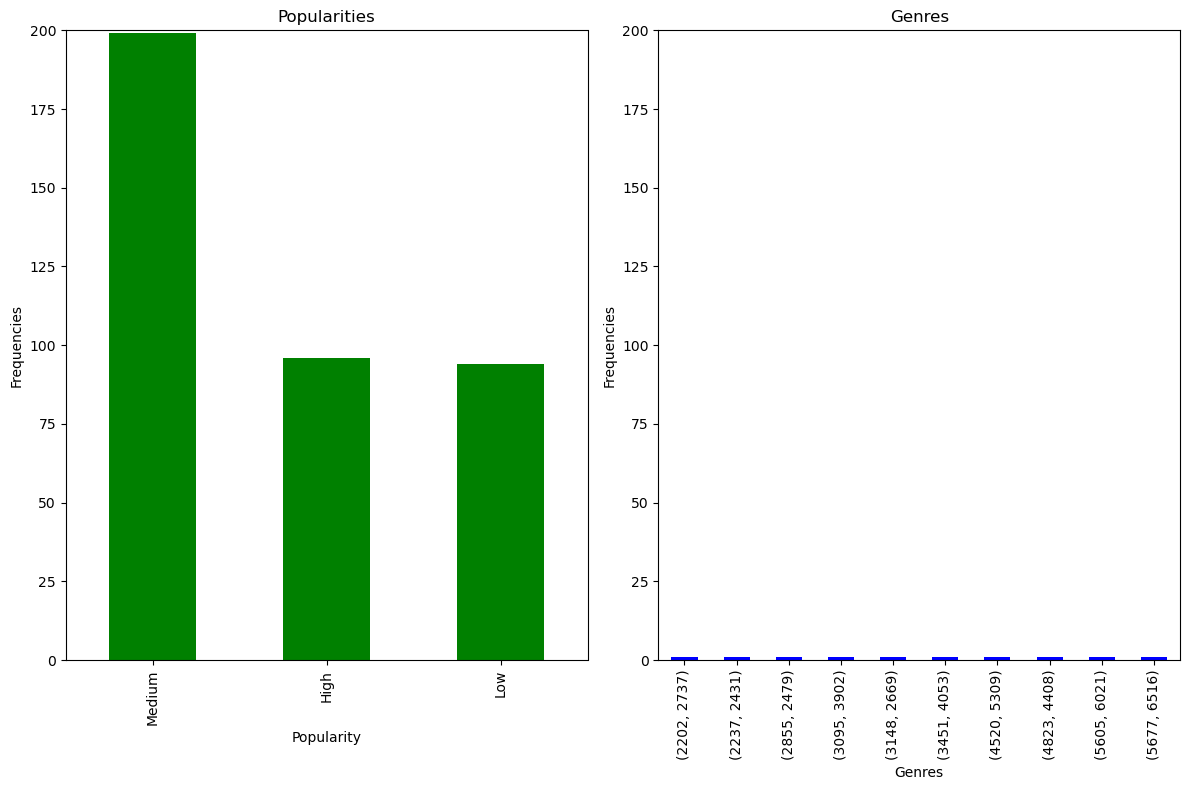

In [20]:
def categorize_popularity(popularity):
    if popularity > df['Popularity'].quantile(0.75):
        return 'High'
    elif popularity >= df['Popularity'].quantile(0.25):
        return 'Medium'
    else:
        return 'Low'
    
df['Popularity_Category'] = df['Popularity'].apply(categorize_popularity)

fig, axs = plt.subplots(1, 2, figsize=(12, 8))

df['Popularity_Category'].value_counts().plot(kind="bar", color="green", ax = axs[0])
axs[0].set_title('Popularities')
axs[0].set_ylabel('Frequencies')
axs[0].set_xlabel('Popularity')
axs[0].set_ylim([0, 200])



expanded_genres = df['Genres'].str.split(', ').explode()
top_10_genres = expanded_genres.value_counts().head(10).index

# Creating a new dataframe that maps songs to each genre they belong to
genre_mappings = expanded_genres.reset_index().merge(df[['Energy', 'Dance']], left_on='index', right_index=True)
genre_mappings = genre_mappings[genre_mappings['Genres'].isin(top_10_genres)]

aggregated_values = genre_mappings.groupby('Genres').agg({'Energy': 'sum', 'Dance': 'sum'})


aggregated_values.value_counts().plot(kind="bar", color="blue", ax = axs[1])
axs[1].set_title('Genres')
axs[1].set_ylabel('Frequencies')
axs[1].set_xlabel('Genres')
axs[1].set_ylim([0, 200])

plt.tight_layout()

plt.show()


I use scattered plot to see the deviation of our data.

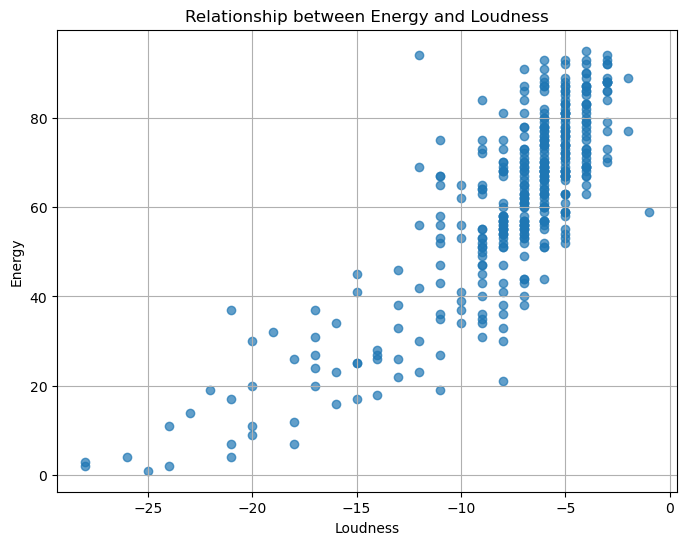

In [21]:
plt.figure(figsize=(8, 6))

plt.scatter(df['Loud'], df['Energy'], alpha = 0.7)

plt.title('Relationship between Energy and Loudness')
plt.xlabel('Loudness')
plt.ylabel('Energy')

#plt.xlim(-20, -2)
#plt.ylim(0, 100)

plt.grid(True)

plt.show()    


I assign a new variable again to have a better visualization examples over my data.

In [22]:
df['Album Date'] = pd.to_datetime(df['Album Date'], errors='coerce')

df['Month'] = df['Album Date'].dt.month

avg_popularity_by_month = df.groupby('Month')['Popularity'].mean()

df.head()


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview,Popularity_Category,Month
1,1,The Power of Love,Céline Dion,73,140,canadian pop,Pop,The Colour Of My Love,1993-11-09,05:42,...,G#/A♭ Major,4,2023-12-10,5kK1Iru9ogP3Iy1zsANU1n,Columbia,4B,https://i.scdn.co/image/ab67616d00004851b3d0e0...,https://p.scdn.co/mp3-preview/7d88cb368e189a99...,High,11.0
2,2,Love In Portofino,Andrea Bocelli,49,95,"classical tenor, italian tenor, operatic pop","Classical, Pop",Love In Portofino,2013-01-01,03:00,...,C Minor,4,2023-12-10,34btMnuONjpqdibkFGvFz5,Universal Music Group International,5A,https://i.scdn.co/image/ab67616d00004851435af4...,null,Medium,1.0
3,3,Bésame Mucho,"Consuelo Velázquez,Andrea Bocelli",58,95,"classical tenor, italian tenor, operatic pop","Classical, Pop",Amor (Spanish Edition / Remastered),2006-01-01,04:01,...,F Minor,4,2023-12-10,5WHnE8MsLFHqSUwecrs7WO,Universal Music Group International,4A,https://i.scdn.co/image/ab67616d000048517068ff...,null,Medium,1.0
4,4,Con te partirò,Andrea Bocelli,37,102,"classical tenor, italian tenor, operatic pop","Classical, Pop",Romanza (Remastered),1996-01-01,04:11,...,G Major,4,2023-12-10,6T720JbJdg8lB5kqfvh5mk,Universal Music Group International,9B,https://i.scdn.co/image/ab67616d000048512f2b98...,null,Low,1.0
5,5,L'italiano,Toto Cutugno,71,121,classic italian pop,Pop,L'Italiano,1983-02-01,03:56,...,A#/B♭ Minor,4,2023-12-10,2S7RApTsKT0CtYojYq2cKz,Carosello Records,3A,https://i.scdn.co/image/ab67616d00004851d919d1...,https://p.scdn.co/mp3-preview/75200ca2b1076f59...,Medium,2.0


In [23]:
Now, lets use our new variable to see

SyntaxError: invalid syntax (4273462720.py, line 1)

In [ ]:
custom_month_order = [calendar.month_abbr[i] for i in range(1, 13)]

plt.figure(figsize=(10, 6))
plt.plot(avg_popularity_by_month.index, avg_popularity_by_month.values, marker='o', linestyle='-', color = "red")

plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Music Albums Across Months')
plt.xticks(range(1, 13), custom_month_order)  # Use actual month numbers for x-axis ticks

plt.ylim(avg_popularity_by_month.min() - 5, avg_popularity_by_month.max() + 5)

plt.xticks(rotation=45)
plt.grid(True)

plt.show()


#DO NOT FORGET TO WRITE

In [ ]:
expanded_genres = df['Genres'].str.split(', ').explode()
top_10_genres = expanded_genres.value_counts().head(10).index

# Creating a new dataframe that maps songs to each genre they belong to
genre_mappings = expanded_genres.reset_index().merge(df[['Energy', 'Dance']], left_on='index', right_index=True)
genre_mappings = genre_mappings[genre_mappings['Genres'].isin(top_10_genres)]

aggregated_values = genre_mappings.groupby('Genres').agg({'Energy': 'sum', 'Dance': 'sum'})
plt.figure(figsize=(10, 6))
aggregated_values.plot(kind='bar', stacked=True, color=['#669bbc', '#003049'], figsize=(10, 6))
plt.title('Energy and Dance Values by Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Value')
#plt.xticks(rotation=45)
plt.show()

In [ ]:
df[['#', 'Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']] = df[['#', 'Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']].apply(pd.to_numeric)
#df['Loud'] = df['Loud'].str.extract('(-?\d+)').astype(int)

numerical_columns = df.select_dtypes(include = ['int64', 'float64'])
correlation_matrix = numerical_columns.corr()

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=.5, ax=ax)

plt.title("Correlation Heatmap of the Numerical Columns")
plt.show()

# Hypothesis Testing

#Supervised learning

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(data= df, y='Popularity', x='BPM', color='#054907').set(title='Regression Plot - Popularity vs BPM Correlation')